In [56]:
import pandas as pd
data = pd.read_csv('/home/leong/Desktop/sleep/Sleep_health_and_lifestyle_dataset.csv')
data.head()

,Person ID,Gender,Age,Occupation,Sleep Duration,Quality of Sleep,Physical Activity Level,Stress Level,BMI Category,Blood Pressure,Heart Rate,Daily Steps,Sleep Disorder
0,1,Male,27,Software Engineer,6.1,6,42,6,Overweight,126/83,77,4200,None
1,2,Male,28,Doctor,6.2,6,60,8,Normal,125/80,75,10000,None
2,3,Male,28,Doctor,6.2,6,60,8,Normal,125/80,75,10000,None
3,4,Male,28,Sales Representative,5.9,4,30,8,Obese,140/90,85,3000,Sleep Apnea
4,5,Male,28,Sales Representative,5.9,4,30,8,Obese,140/90,85,3000,Sleep Apnea


In [57]:
data.isnull().sum()

Person ID                  0
Gender                     0
Age                        0
Occupation                 0
Sleep Duration             0
Quality of Sleep           0
Physical Activity Level    0
Stress Level               0
BMI Category               0
Blood Pressure             0
Heart Rate                 0
Daily Steps                0
Sleep Disorder             0
dtype: int64

In [58]:
data.describe()

,Person ID,Age,Sleep Duration,Quality of Sleep,Physical Activity Level,Stress Level,Heart Rate,Daily Steps
count,374.000000,374.000000,374.000000,374.000000,374.000000,374.000000,374.000000,374.000000
mean,187.500000,42.184492,7.132086,7.312834,59.171123,5.385027,70.165775,6816.844920
std,108.108742,8.673133,0.795657,1.196956,20.830804,1.774526,4.135676,1617.915679
min,1.000000,27.000000,5.800000,4.000000,30.000000,3.000000,65.000000,3000.000000
25%,94.250000,35.250000,6.400000,6.000000,45.000000,4.000000,68.000000,5600.000000
50%,187.500000,43.000000,7.200000,7.000000,60.000000,5.000000,70.000000,7000.000000
75%,280.750000,50.000000,7.800000,8.000000,75.000000,7.000000,72.000000,8000.000000
max,374.000000,59.000000,8.500000,9.000000,90.000000,8.000000,86.000000,10000.000000


Exploratory Data Analysis

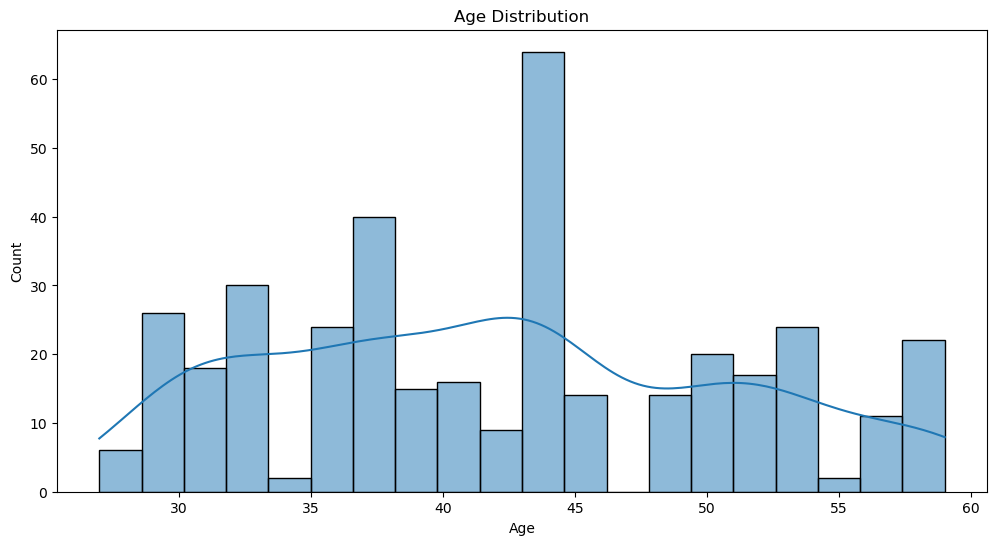

In [59]:
import matplotlib.pyplot as plt
import seaborn as sns

# plot of Gender and Age Distribution
plt.figure(figsize=(12, 6))
sns.histplot(data['Age'], bins=20, kde=True)
plt.title('Age Distribution')
plt.xlabel('Age')
plt.show()

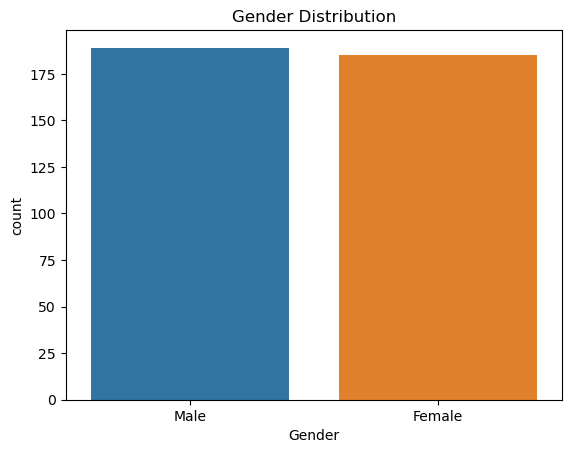

In [60]:
sns.countplot(x='Gender', data=data)
plt.title('Gender Distribution')
plt.show()

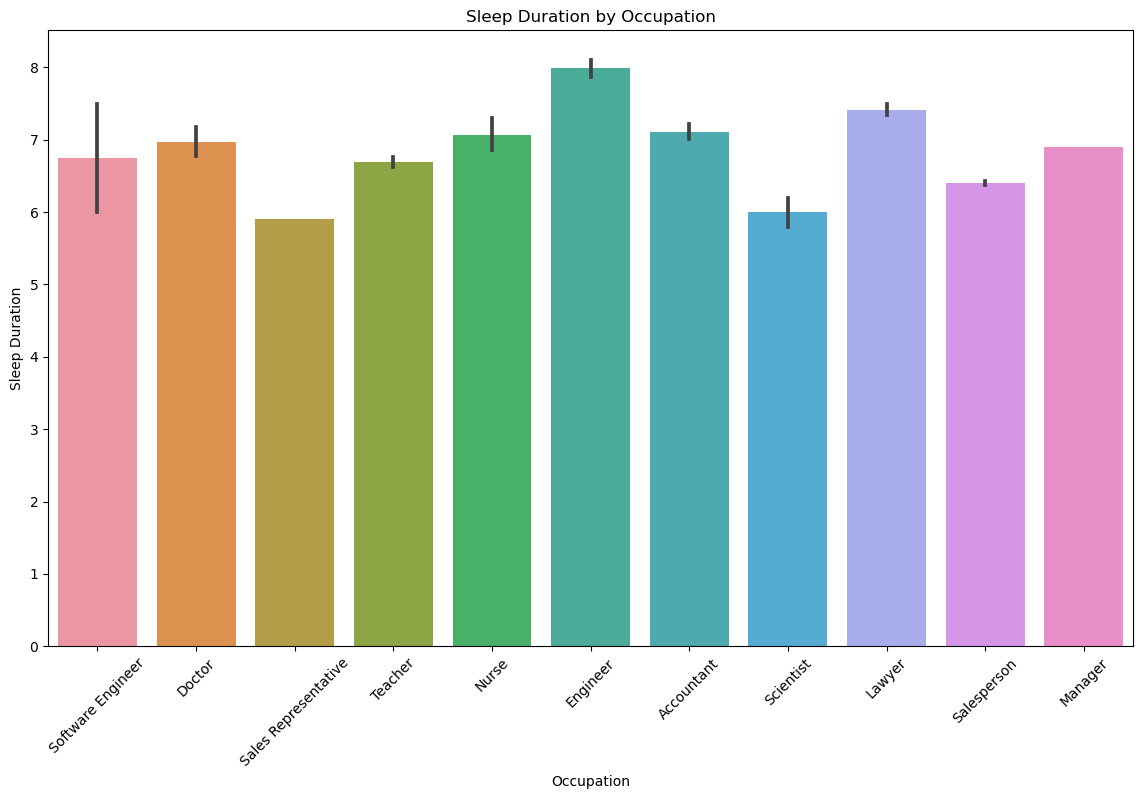

In [61]:
#plot of occupation and sleep analysis
plt.figure(figsize=(14, 8))
sns.barplot(x='Occupation', y='Sleep Duration', data=data)
plt.title('Sleep Duration by Occupation')
plt.xlabel('Occupation')
plt.ylabel('Sleep Duration')
plt.xticks(rotation=45)
plt.show()

/tmp/ipykernel_6117/724770965.py:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation_matrix = data.corr()


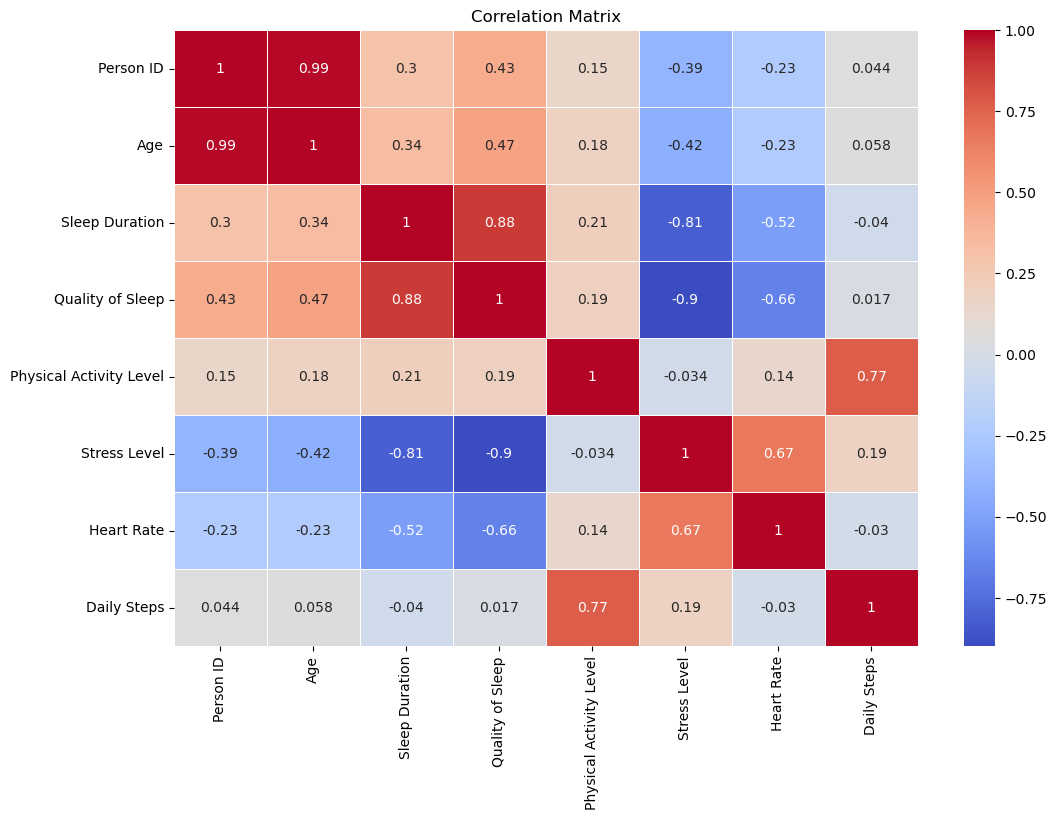

In [62]:
# Correlation Analysis
correlation_matrix = data.corr()
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', linewidths=.5)
plt.title('Correlation Matrix')
plt.show()

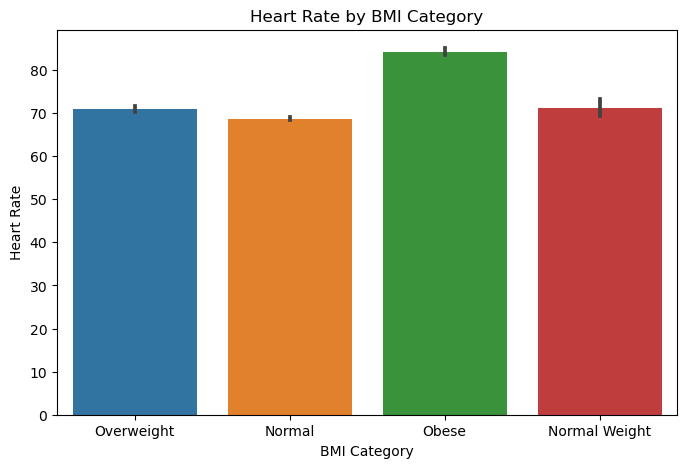

In [63]:
# Heart Rate Analysis
plt.figure(figsize=(8, 5))
sns.barplot(x='BMI Category', y='Heart Rate', data=data)
plt.title('Heart Rate by BMI Category')
plt.show()


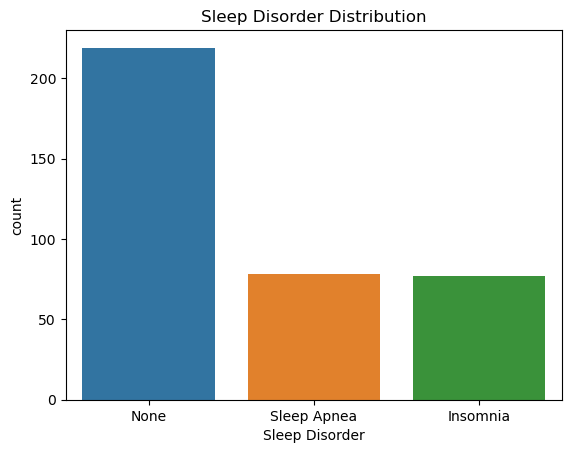

In [64]:
# Sleep Disorder Distribution
sns.countplot(x='Sleep Disorder', data=data)
plt.title('Sleep Disorder Distribution')
plt.show()

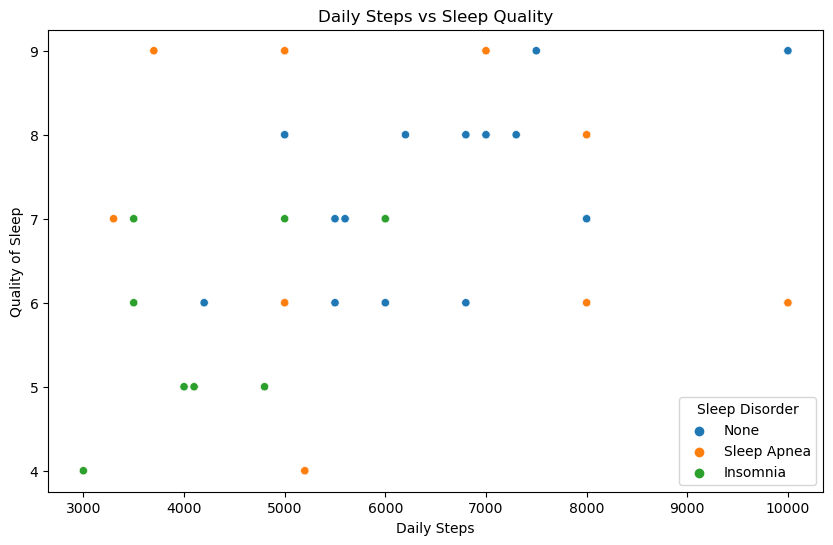

In [65]:
# Daily Steps Analysis
plt.figure(figsize=(10, 6))
sns.scatterplot(x='Daily Steps', y='Quality of Sleep', hue='Sleep Disorder', data=data)
plt.title('Daily Steps vs Sleep Quality')
plt.show()

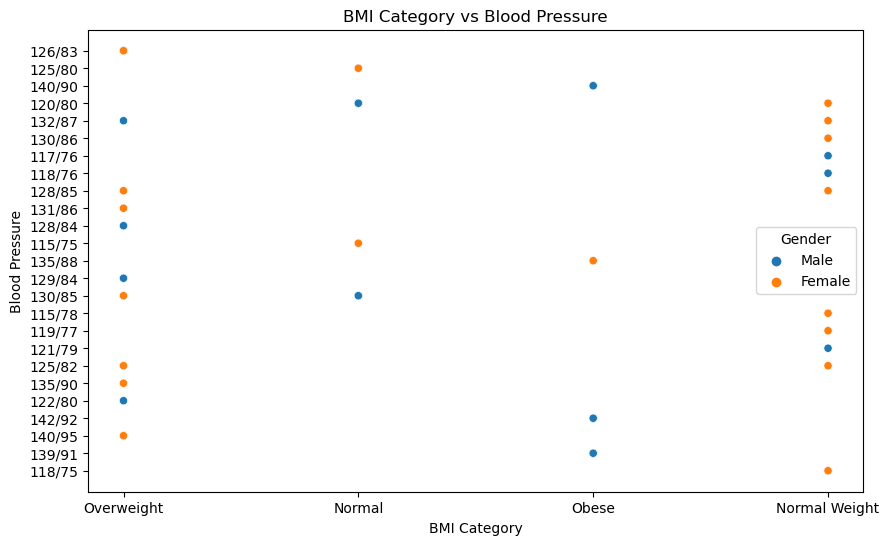

In [66]:
# BMI and Blood Pressure Analysis
plt.figure(figsize=(10, 6))
sns.scatterplot(x='BMI Category', y='Blood Pressure', hue='Gender', data=data)
plt.title('BMI Category vs Blood Pressure')
plt.show()

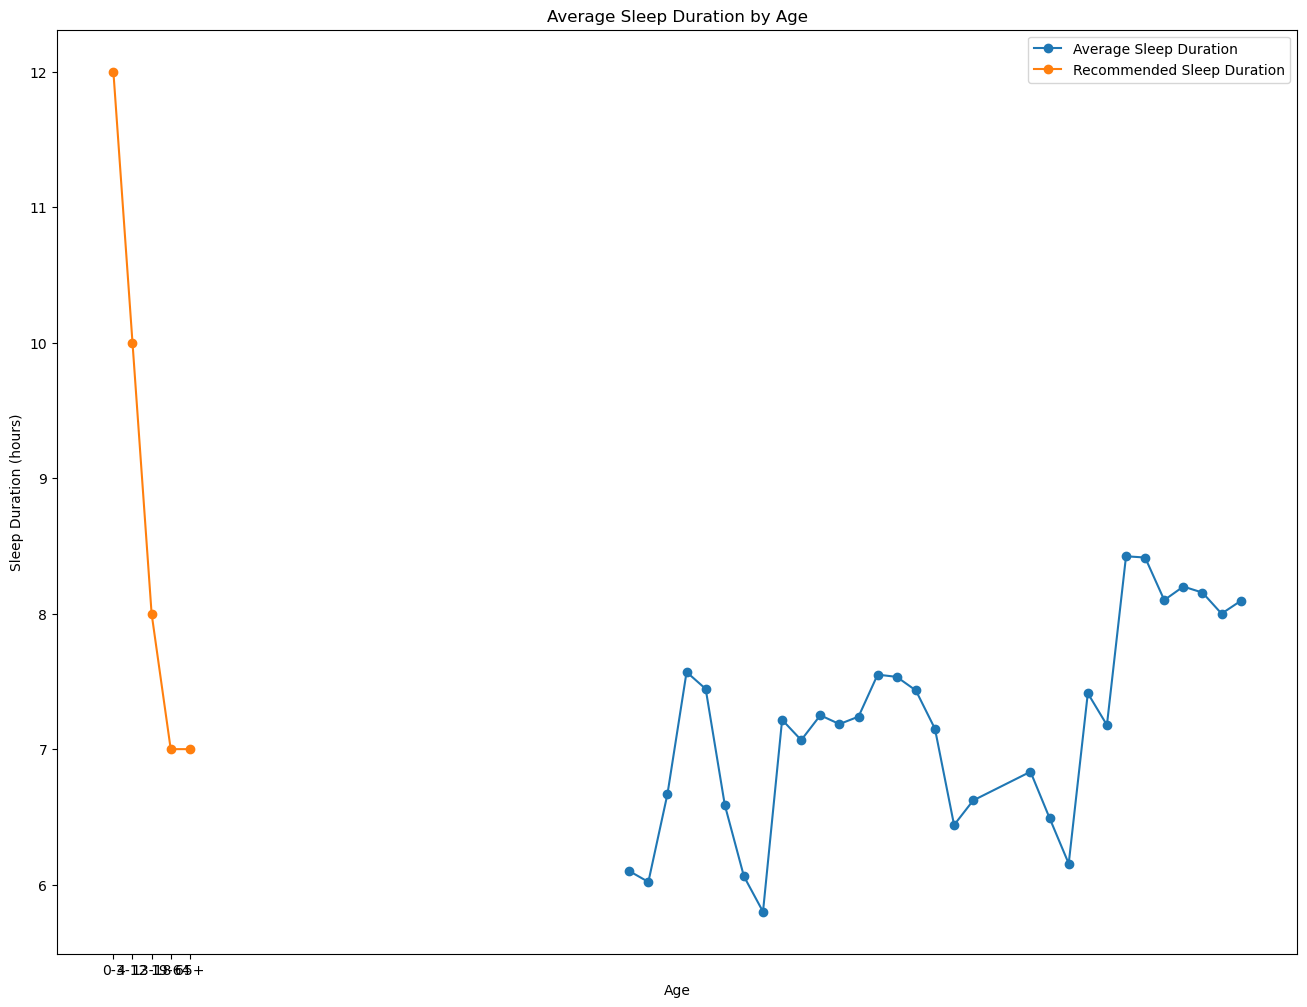

In [67]:
average_sleep_duration_by_age = data.groupby('Age')['Sleep Duration'].mean()

# recommended sleep duration based on age
recommended_sleep_duration = {'0-3': 12, '4-12': 10, '13-18': 8, '19-64': 7, '65+': 7}

# Plot average sleep duration and recommended sleep duration
plt.figure(figsize=(16, 12))
plt.plot(average_sleep_duration_by_age.index, average_sleep_duration_by_age.values, marker='o', label='Average Sleep Duration')
plt.plot(recommended_sleep_duration.keys(), recommended_sleep_duration.values(), marker='o', label='Recommended Sleep Duration')
plt.xlabel('Age')
plt.ylabel('Sleep Duration (hours)')
plt.title('Average Sleep Duration by Age')
plt.legend()
plt.show()

In [68]:
def personalized_sleep_recommendations(individual_data):
    recommendations = []

    # Sleep Duration Recommendation
    if individual_data['Age'] < 18:
        recommendations.append("For individuals under 18, aim for 8-10 hours of sleep per night.")
    elif 18 <= individual_data['Age'] <= 64:
        recommendations.append("For adults, aim for 7-9 hours of sleep per night.")
    else:
        recommendations.append("For older adults, aim for 7-8 hours of sleep per night.")

#continues tomorrow.......